In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scripts.config import Config
from scripts.data_fetcher import DataFetcher
from scripts.model import Model

In [3]:
config = Config()
model = Model(config)
all_ways = model.data_fetcher.get_ways()

In [4]:
friendly_ways = model.filter_ways(all_ways)

In [5]:
len(all_ways), len(friendly_ways)

(7253, 221)

In [6]:
ways = all_ways
nodes_on_ways = set()
for way in ways:
    nodes = way.get_nodes(resolve_missing=True)
    nodes = [node for node in nodes if model.node_in_area(node)]
    for node in nodes:
        nodes_on_ways.add(node)

In [10]:
node_graph = nx.Graph()
node_graph.add_nodes_from([node.id for node in nodes_on_ways])
for node in nodes_on_ways:
    node_graph.nodes[node.id]['pos'] = (float(node.lon), float(node.lat))
node_layout = nx.get_node_attributes(node_graph, 'pos')

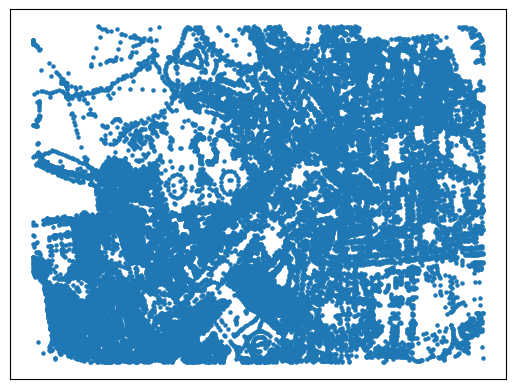

In [11]:
nx.draw_networkx(node_graph, pos=node_layout, with_labels=False, node_size=5)

In [15]:
len(node_graph.nodes)

39227

In [ ]:
def ways_to_dol(ways):
    link_counter: Dict[int, int] = {}
    for way in ways:
        nodes = way.get_nodes(resolve_missing=True)
        nodes = [node for node in nodes if model.node_in_area(node)]
        for node in nodes:
            link_counter[node.id] = link_counter.get(node.id, 0) + 1

    dol: Dict[int, List[int]] = {}
    for way in ways:
        nodes = way.get_nodes(resolve_missing=True)
        nodes = [node for node in nodes if model.node_in_area(node)]

        cur_pointer = 0
        cur_node = nodes[cur_pointer]
        next_pointer = cur_pointer + 1
        while next_pointer < len(nodes):
            next_node = nodes[next_pointer]
            if (link_counter[next_node.id] > 1 or next_pointer == len(nodes) - 1) \
                    and cur_node.id != next_node.id:
                neighbours = dol.get(cur_node.id, [])
                neighbours.append(next_node.id)
                dol[cur_node.id] = neighbours
                
                neighbours = dol.get(next_node.id, [])
                neighbours.append(cur_node.id)
                dol[next_node.id] = neighbours
                
                cur_pointer = next_pointer
                next_pointer = cur_pointer + 1
            else:
                next_pointer += 1
    return dol

In [ ]:
all_dol = ways_to_dol(all_ways)
friendly_dol = ways_to_dol(friendly_ways)

In [ ]:
all_nodes = [model.data_fetcher.get_node_by_id(node_id) for node_id in all_dol.keys()]
friendly_nodes = [model.data_fetcher.get_node_by_id(node_id) for node_id in friendly_dol.keys()]

In [ ]:
all_graph = nx.Graph(all_dol)
for node in all_nodes:
    all_graph.nodes[node.id]['pos'] = (float(node.lon), float(node.lat))
all_layout = nx.get_node_attributes(all_graph, 'pos')

In [ ]:
nx.draw_networkx(all_graph, pos=all_layout, with_labels=False, node_size=5)

In [ ]:
friendly_graph = nx.Graph(friendly_dol)
for node in friendly_nodes:
    friendly_graph.nodes[node.id]['pos'] = (float(node.lon), float(node.lat))
friendly_layout = nx.get_node_attributes(friendly_graph, 'pos')

In [ ]:
nx.draw_networkx(friendly_graph, pos=friendly_layout, with_labels=False, node_size=5)

In [ ]:
len(all_graph.edges)